<a href="https://colab.research.google.com/github/AleAfonsodeCarvalho/FIAP/blob/main/FIAP_TECH_CHALLENGE_FASE_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

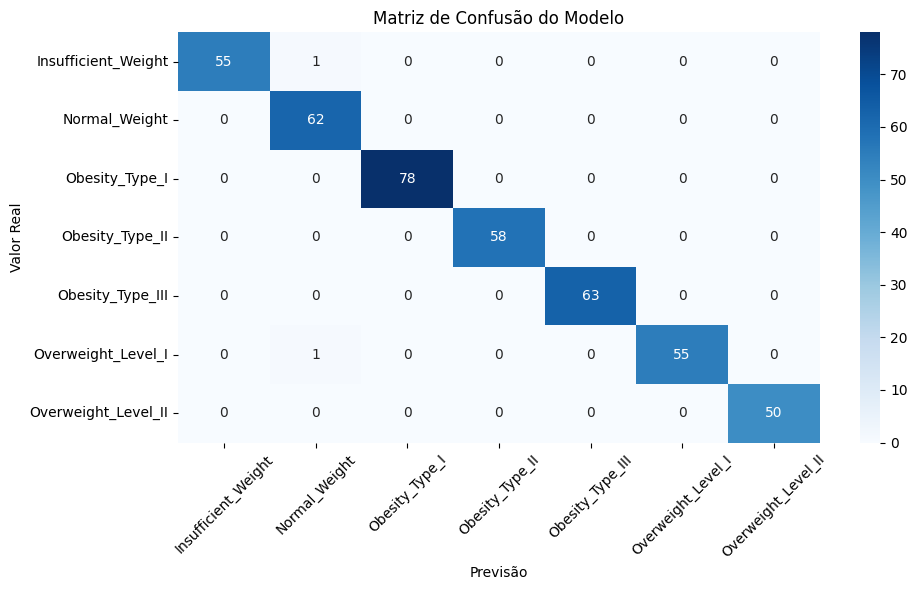

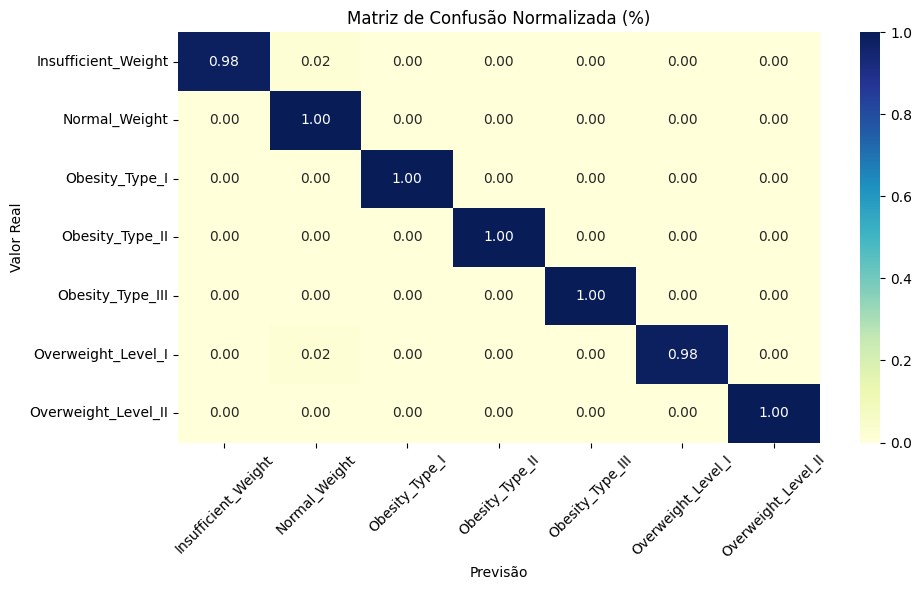

/tmp/ipython-input-3406867237.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Obesity', data=df, palette='viridis')


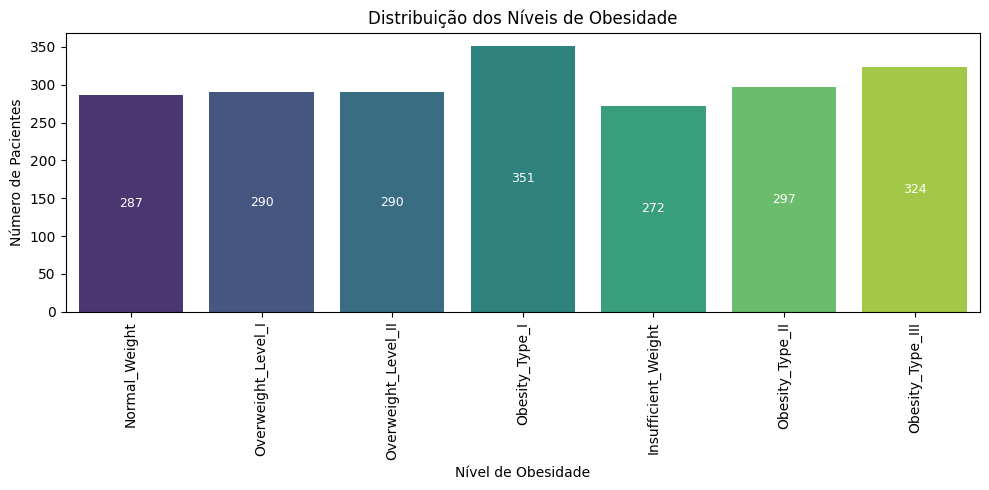

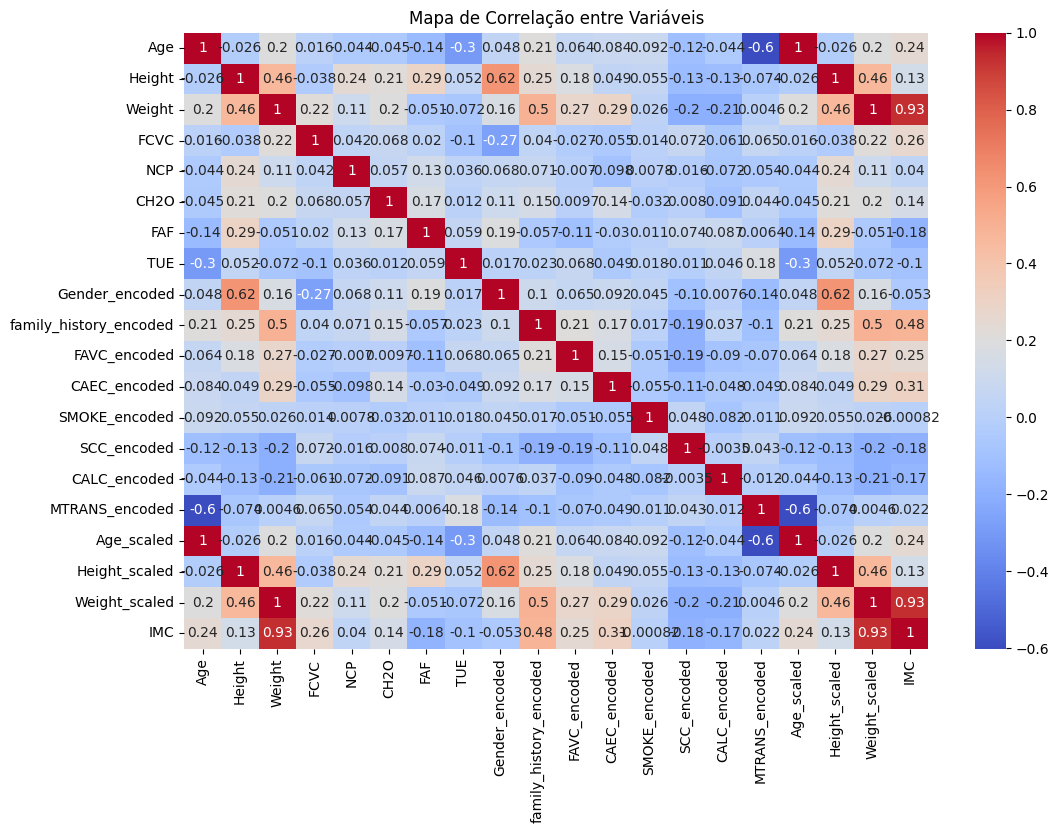

/tmp/ipython-input-3406867237.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obesity', y='IMC', data=df, palette='magma')


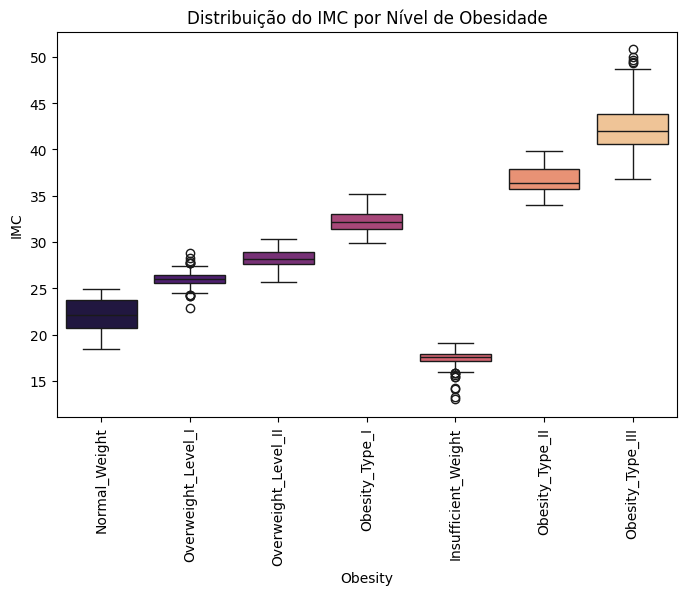

/tmp/ipython-input-3406867237.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obesity', y='FAF', data=df, palette='cubehelix')


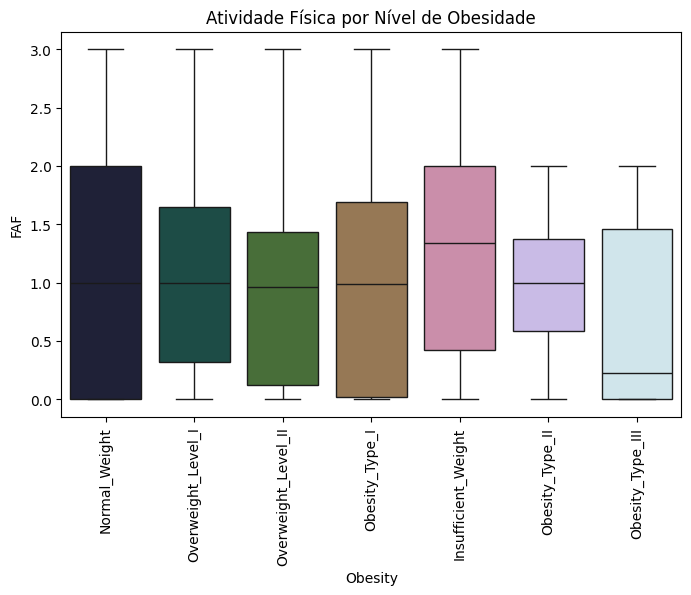

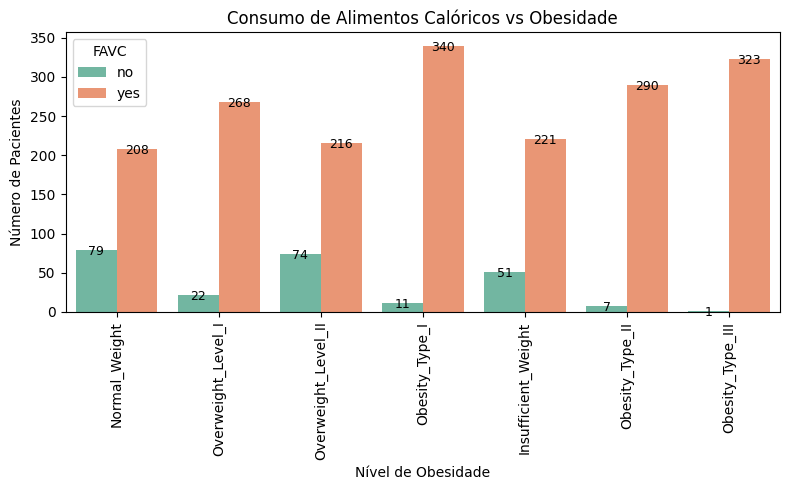

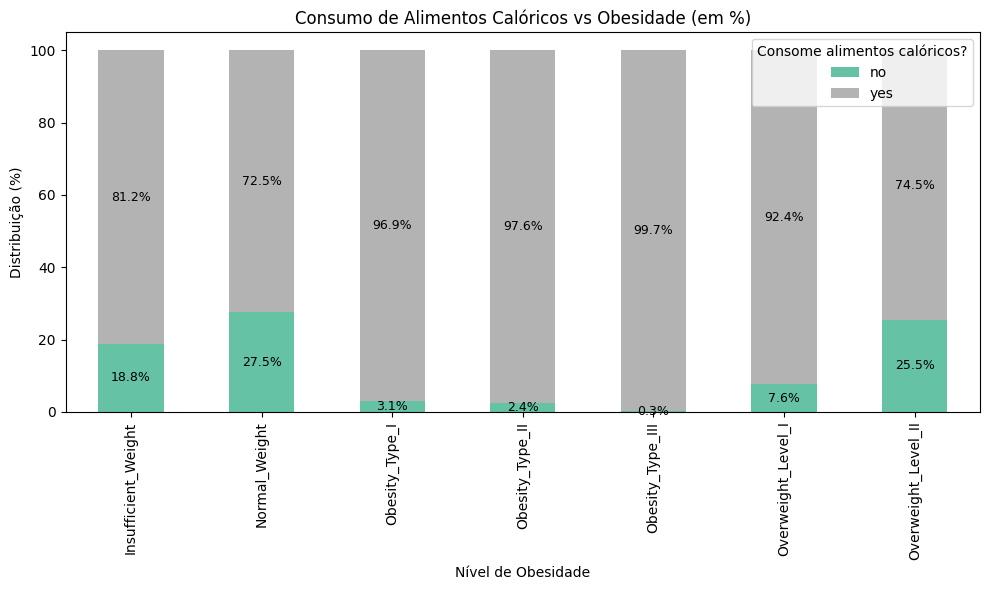

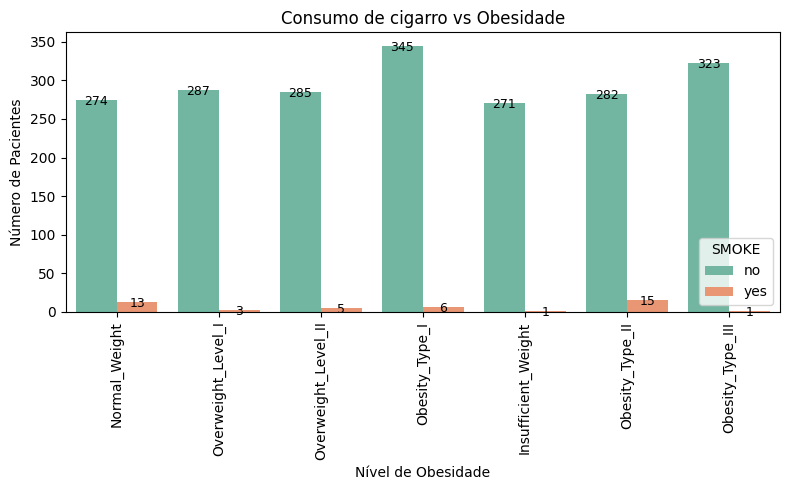

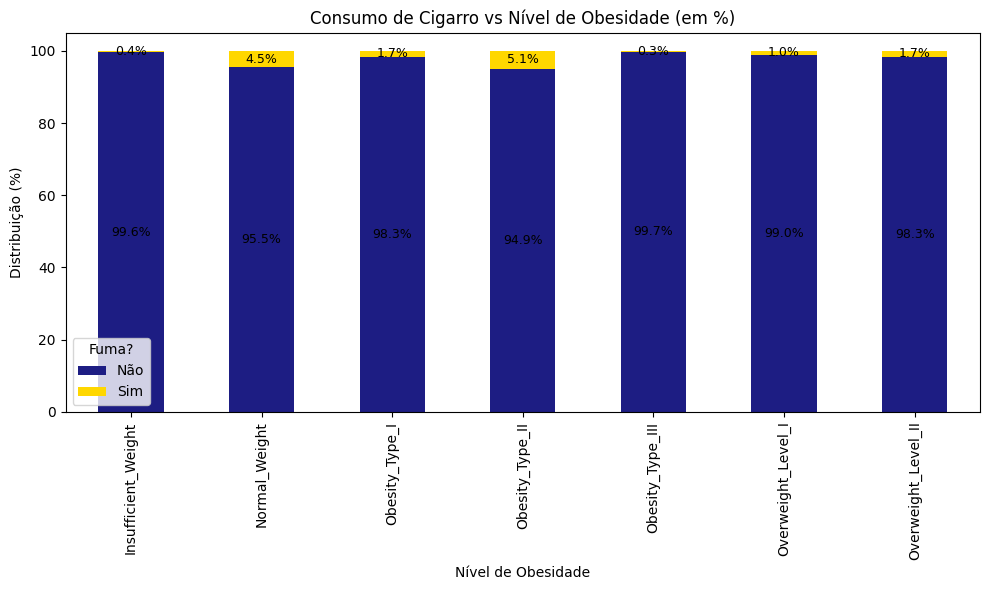

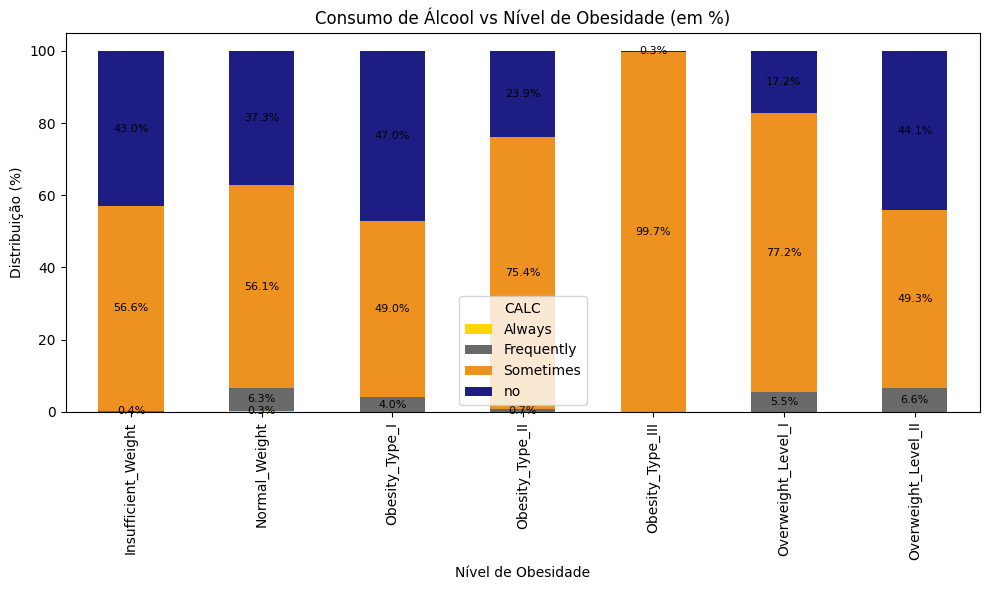

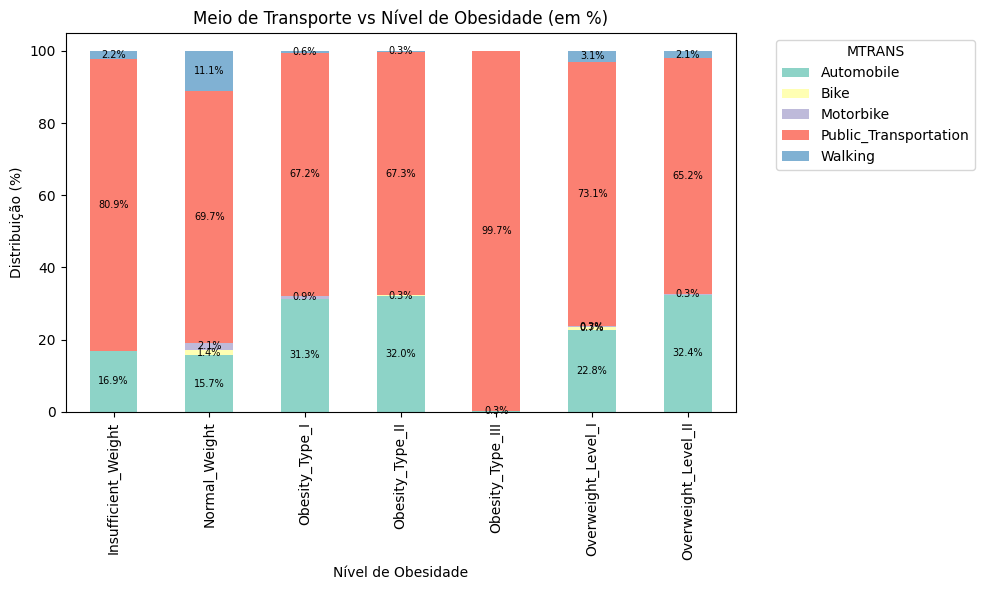

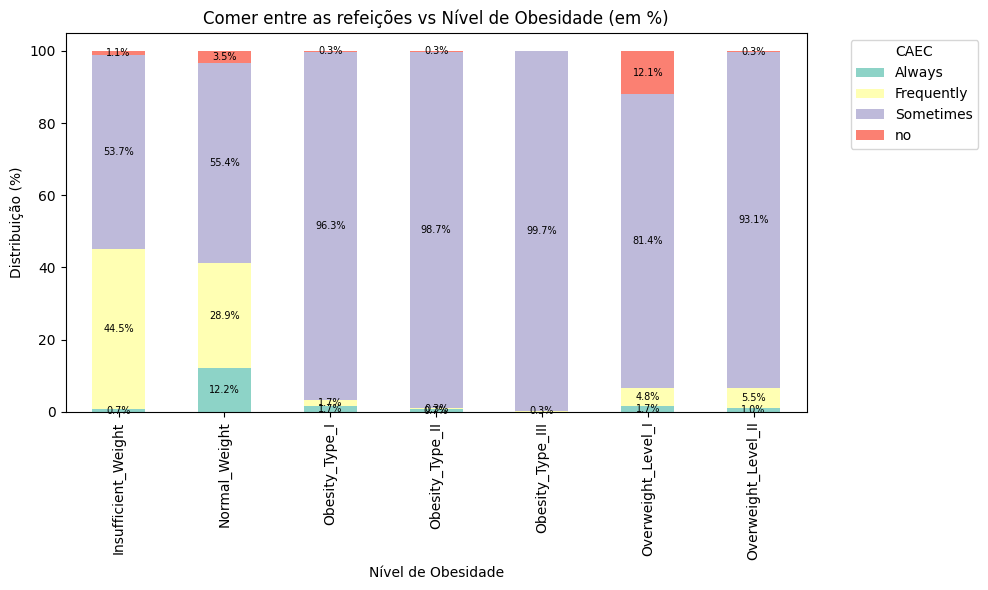

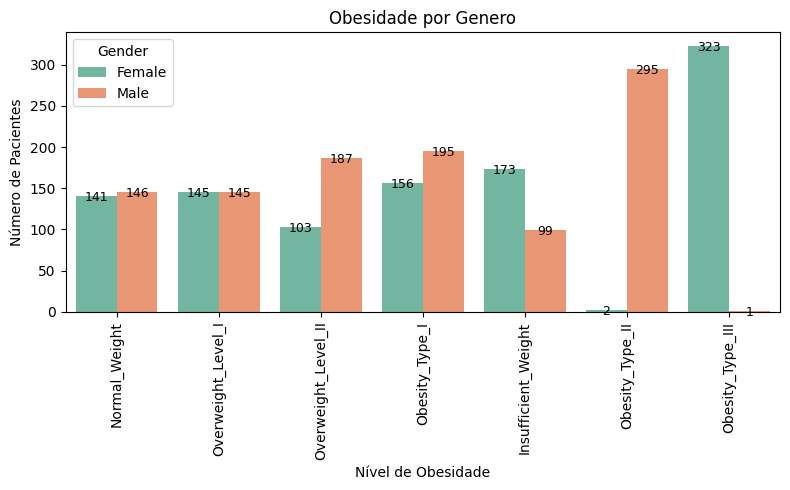

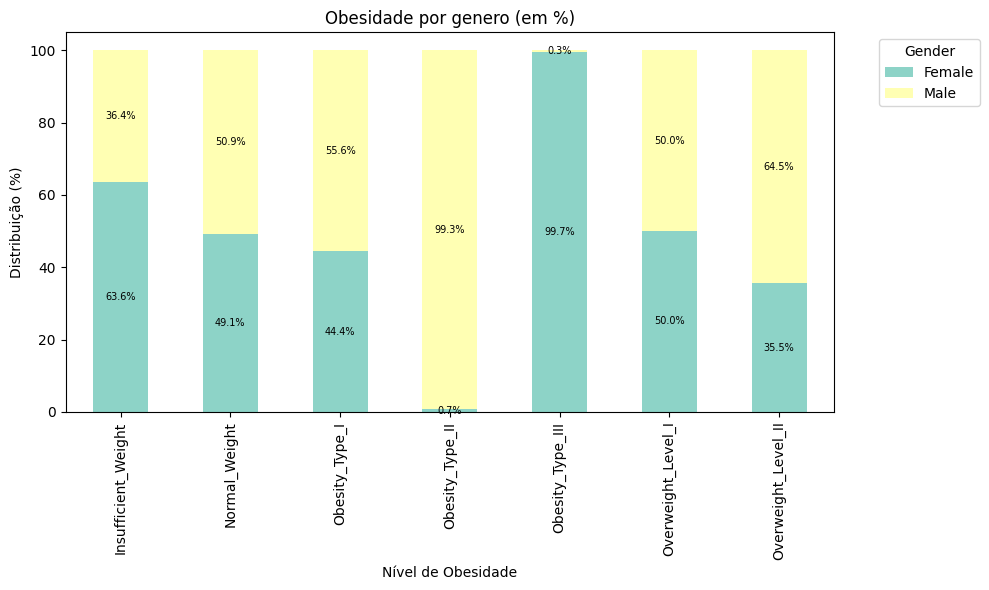

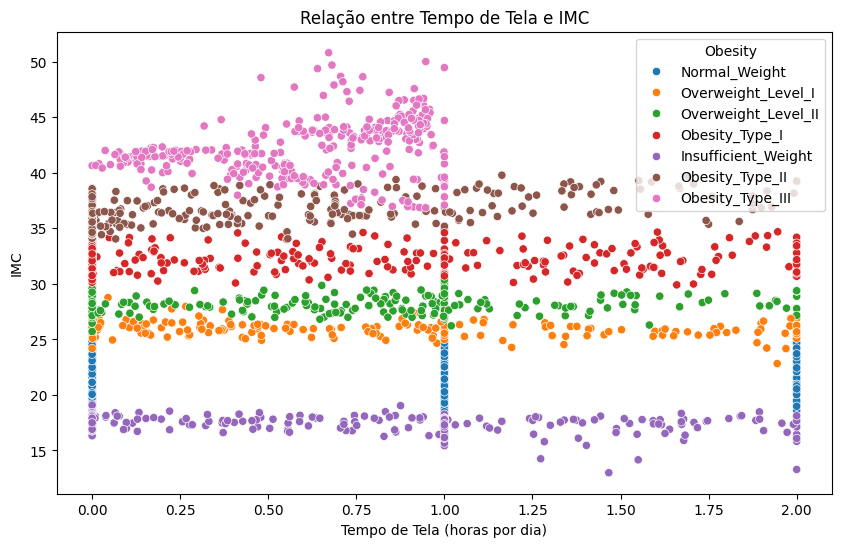

In [6]:
#Projeto: Tech Challenge - Fase 4 - Data Analytics Pós Tech FIAP
#Aluno: Alexandre Afonso de Carvalho Usuário:
#RM358820
#Desafio: desenvolver um modelo de Machine Learning para auxiliar os médicos e médicas a rever se uma pessoa pode ter obesidade.


#Importanto as bibliotécas necessesáriasy

import pandas             as pd                                   # Manipulação de dados em formato de tabela
import numpy              as np                                   # Operações matemáticas e estatísticas
import matplotlib.pyplot  as plt                                  # Gráficos simples
import seaborn            as sns                                  # Gráficos mais bonitos e informativos
import pickle

!pip install streamlit

from sklearn.model_selection  import train_test_split                   # Separar dados em treino e teste
from sklearn.preprocessing    import StandardScaler, LabelEncoder       # Normalizar e codificar dados
from sklearn.ensemble         import RandomForestClassifier             # Modelo de ML
from sklearn.metrics          import classification_report, accuracy_score, confusion_matrix  # Avaliação

df = pd.read_csv('/content/sample_data/Obesity.csv')  # Carrega o arquivo
df.head()                        # Mostra as primeiras linhas
df.info()                        # Mostra tipos de dados e se há valores nulos
df.describe()                    # Estatísticas básicas das colunas numéricas
print(df)

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificação de variáveis categóricas (sem incluir a coluna alvo)
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns.drop('Obesity')

for col in categorical_cols:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Normalização de variáveis numéricas
scaler = StandardScaler()
num_cols = ['Age', 'Height', 'Weight']

for col in num_cols:
    df[col + '_scaled'] = scaler.fit_transform(df[[col]])

# Criação da variável IMC
df['IMC'] = df['Weight'] / (df['Height'] ** 2)

print(df)

#Separação entre treino e teste

from sklearn.model_selection import train_test_split

# Selecionando colunas preparadas
encoded_cols = [col + '_encoded' for col in categorical_cols]
scaled_cols = [col + '_scaled' for col in num_cols]

X = df[encoded_cols + scaled_cols + ['IMC']]
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Treinamento do modelo

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Avaliação do modelo

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Previsões
y_pred = model.predict(X_test)

# Métricas
acuracia = accuracy_score(y_test, y_pred)
relatorio = classification_report(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

# Exibir resultados
print("Acurácia do modelo:", round(acuracia * 100, 2), "%")
print("\nRelatório de Classificação:\n", relatorio)
print("\nMatriz de Confusão:\n", matriz)


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Previsões
y_pred = model.predict(X_test)

# Métricas
acuracia = accuracy_score(y_test, y_pred)
relatorio = classification_report(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

# Exibir resultados numéricos
print("Acurácia do modelo:", round(acuracia * 100, 2), "%")
print("\nRelatório de Classificação:\n", relatorio)
print("\nMatriz de Confusão:\n", matriz)

# Gráfico da matriz
plt.figure(figsize=(10,6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusão do Modelo')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Normalização

import numpy as np

# Normalizar por linha (por classe real)
matriz_norm = matriz.astype('float') / matriz.sum(axis=1)[:, np.newaxis]

# Gráfico da matriz normalizada
plt.figure(figsize=(10,6))
sns.heatmap(matriz_norm, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusão Normalizada (%)')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Exportação do modelo e do scaler

import pickle

# Exportar modelo
with open('modelo_obesidade.pkl', 'wb') as file:
    pickle.dump(model, file)

# Exportar scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

#Distribuição dos Níveis de Obesidade

plt.figure(figsize=(10,5))
ax = sns.countplot(x='Obesity', data=df, palette='viridis')
plt.title('Distribuição dos Níveis de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=90)

# Adicionar rótulos dentro das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height / 2,  # centralizado verticalmente
            s=f'{height:.0f}',
            ha='center',
            va='center',
            fontsize=9,
            color='white'  # branco para contraste com fundo escuro
        )

plt.tight_layout()
plt.show()

#Correlação entre variáveis

plt.figure(figsize=(12,8))
# Select only numerical and encoded categorical columns for correlation
correlation_df = df.select_dtypes(include=np.number)
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação entre Variáveis')
plt.show()

#IMC por nível de obesidade

plt.figure(figsize=(8,5))
sns.boxplot(x='Obesity', y='IMC', data=df, palette='magma')
plt.title('Distribuição do IMC por Nível de Obesidade')
plt.xticks(rotation=90)
plt.show()

#Atividade física vs obesidade

plt.figure(figsize=(8,5))
sns.boxplot(x='Obesity', y='FAF', data=df, palette='cubehelix')
plt.title('Atividade Física por Nível de Obesidade')
plt.xticks(rotation=90)
plt.show()

#Alimentação calórica (FAVC) vs obesidade

plt.figure(figsize=(8,5))
ax = sns.countplot(x='Obesity', hue='FAVC', data=df, palette='Set2')
plt.title('Consumo de Alimentos Calóricos vs Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=90)

# Adicionar rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height - 2,  # ou y=height + 1 para colocar acima
            s=f'{height:.0f}',
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )

plt.tight_layout()
plt.show()

#Consumo de Alimentos Calóricos vs Obesidade

import pandas as pd
import matplotlib.pyplot as plt

# 1. Tabela de frequência cruzada
cross_tab = pd.crosstab(df['Obesity'], df['FAVC'])

# 2. Converter para porcentagem por linha
percent_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

colors = ['#66c2a5','#FFD700']  # verde claro e amarelo ouro

# 3. Plotar gráfico empilhado
ax = percent_tab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

# 4. Adicionar rótulos de porcentagem em cada segmento
for i, row in enumerate(percent_tab.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
            cumulative += val

# 5. Personalizar
plt.title('Consumo de Alimentos Calóricos vs Obesidade (em %)')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Distribuição (%)')
plt.xticks(rotation=90)
plt.legend(title='Consome alimentos calóricos?')
plt.tight_layout()
plt.show()

#Consumo de cigarro vs obesidade

plt.figure(figsize=(8,5))
ax = sns.countplot(x='Obesity', hue='SMOKE', data=df, palette='Set2')
plt.title('Consumo de cigarro vs Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=90)

# Adicionar rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height - 2,  # ou y=height + 1 para colocar acima
            s=f'{height:.0f}',
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )

plt.tight_layout()
plt.show()

#Consumo de Cigarro vs Nível de Obesidade (em %)

import pandas as pd
import matplotlib.pyplot as plt

# Tabela de frequência cruzada
cross_tab = pd.crosstab(df['Obesity'], df['SMOKE'])

# Converter para porcentagem
percent_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Definir cores personalizadas (ordem: 'no', 'yes')
colors = ['#1d1d83', '#FFD700']  # azul claro e amarelo ouro

# Plotar gráfico empilhado com cores definidas
ax = percent_tab.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

# Adicionar rótulos de porcentagem
for i, row in enumerate(percent_tab.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
            cumulative += val

# Personalizar
plt.title('Consumo de Cigarro vs Nível de Obesidade (em %)')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Distribuição (%)')
plt.xticks(rotation=90)
plt.legend(title='Fuma?', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

#Consumo de alcool

cross_tab = pd.crosstab(df['Obesity'], df['CALC'])
percent_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

colors = ['#FFD700', '#696969', '#ed9121', '#1d1d83']  # Cores para: no, Sometimes, Frequently, Always

ax = percent_tab.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

for i, row in enumerate(percent_tab.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=8)
            cumulative += val

plt.title('Consumo de Álcool vs Nível de Obesidade (em %)')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Distribuição (%)')
plt.xticks(rotation=90)
plt.legend(title='CALC')
plt.tight_layout()
plt.show()

#Meios de transporte

cross_tab = pd.crosstab(df['Obesity'], df['MTRANS'])
percent_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3']  # Cores para cada meio de transporte

ax = percent_tab.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

for i, row in enumerate(percent_tab.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=7)
            cumulative += val

plt.title('Meio de Transporte vs Nível de Obesidade (em %)')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Distribuição (%)')
plt.xticks(rotation=90)
plt.legend(title='MTRANS', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Comer entre as refeições x Obesidade

cross_tab = pd.crosstab(df['Obesity'], df['CAEC'])
percent_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3']  # Cores para cada meio de transporte

ax = percent_tab.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

for i, row in enumerate(percent_tab.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=7)
            cumulative += val

plt.title('Comer entre as refeições vs Nível de Obesidade (em %)')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Distribuição (%)')
plt.xticks(rotation=90)
plt.legend(title='CAEC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Obsesidade por genero

plt.figure(figsize=(8,5))
ax = sns.countplot(x='Obesity', hue='Gender', data=df, palette='Set2')
plt.title('Obesidade por Genero')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=90)

# Adicionar rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height - 2,  # ou y=height + 1 para colocar acima
            s=f'{height:.0f}',
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )

plt.tight_layout()
plt.show()


#Obsesidade por genero - Em %

cross_tab = pd.crosstab(df['Obesity'], df['Gender'])
percent_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3']  # Cores para cada meio de transporte

ax = percent_tab.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

for i, row in enumerate(percent_tab.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=7)
            cumulative += val

plt.title('Obesidade por genero (em %)')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Distribuição (%)')
plt.xticks(rotation=90)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Relação entre Tempo de Tela e IMC

plt.figure(figsize=(10,6))
sns.scatterplot(x='TUE', y='IMC', hue='Obesity', data=df, palette='tab10')
plt.title('Relação entre Tempo de Tela e IMC')
plt.xlabel('Tempo de Tela (horas por dia)')
plt.ylabel('IMC')
plt.show()





In [7]:
!pip install streamlit -q
!pip install pyngrok -q

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib # for loading the model
import pickle # for loading the scaler
from sklearn.preprocessing import LabelEncoder

! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com
! streamlit run app.py & npx localtunnel --port 8501

# --- Configuração Inicial e Carregamento de Recursos ---

# Adicione um bloco try-except para lidar com arquivos não encontrados
try:
    # 1. Carregar modelo e scaler
    model = joblib.load('modelo_obesidade.pkl')
    with open('scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)

    # 2. Carregar o DataFrame original para acesso a colunas e mappings
    # ATENÇÃO: Verifique se este caminho está correto no seu Google Colab
    df_original = pd.read_csv('/content/sample_data/Obesity.csv')

except FileNotFoundError as e:
    st.error(f"Erro ao carregar arquivos. Verifique se 'modelo_obesidade.pkl', 'scaler.pkl' e 'Obesity.csv' estão no caminho correto. Detalhe: {e}")
    st.stop() # Interrompe a execução do app Streamlit se os arquivos faltarem

# --- Definição de Variáveis de Pré-processamento ---

# Colunas definidas conforme seu notebook original
categorical_cols = df_original.select_dtypes(include='object').columns.drop('Obesity')
num_cols_for_scaling = ['Age', 'Height', 'Weight']
# As colunas não escaladas ('FCVC', 'NCP', 'CH2O', 'FAF', 'TUE') não precisam ser tratadas
# aqui se não forem usadas no modelo final, mas são usadas na coleta de input

# Mapeamento para os Selectboxes do Streamlit
categorical_cols_mapping = {col: df_original[col].unique().tolist() for col in categorical_cols}

# Criar e ajustar Label Encoders
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df_original[col])
    label_encoders[col] = le

# Definição final das features que o modelo espera (na ORDEM correta)
model_features = [
    'Gender_encoded', 'family_history_encoded', 'FAVC_encoded', 'CAEC_encoded',
    'SMOKE_encoded', 'SCC_encoded', 'CALC_encoded', 'MTRANS_encoded',
    'Age_scaled', 'Height_scaled', 'Weight_scaled', 'IMC'
]

# --- Função de Pré-processamento ---

def preprocess_input(input_df, label_encoders, scaler, num_cols_for_scaling, categorical_cols, model_features):
    """Aplica todas as transformações de pré-processamento ao DataFrame de entrada."""
    input_df_processed = input_df.copy()

    # 1. Label Encoding
    for col in categorical_cols:
        # Garante que o valor de entrada é válido antes de transformar
        try:
            input_df_processed[col + '_encoded'] = label_encoders[col].transform(input_df_processed[col])
        except ValueError:
            st.error(f"Valor inválido fornecido para a coluna: {col}. Por favor, selecione uma opção válida.")
            return None

    # 2. Cálculo do IMC (usa as colunas originais Height e Weight)
    # CORREÇÃO CRÍTICA: Realizado antes de dropar Height/Weight originais
    input_df_processed['IMC'] = input_df_processed['Weight'] / (input_df_processed['Height'] ** 2)

    # 3. Scaling (somente para as colunas numéricas definidas)
    df_to_scale = input_df_processed[num_cols_for_scaling]
    scaled_data = scaler.transform(df_to_scale)

    for i, col in enumerate(num_cols_for_scaling):
        input_df_processed[col + '_scaled'] = scaled_data[:, i]

    # 4. Drop das colunas originais que não são usadas no modelo final
    # Dropando as colunas que foram escaladas (Age, Height, Weight)
    input_df_processed = input_df_processed.drop(columns=num_cols_for_scaling)

    # 5. Selecionar e reordenar features finais para o modelo
    final_input_df = input_df_processed[model_features]

    return final_input_df

# --- Streamlit App ---
st.title('Aplicação Preditiva de Obesidade')
st.markdown('Este app permite visualizar os dados e fazer previsões com base nas características do paciente.')

st.sidebar.header('Configurações')
st.sidebar.info('Use o painel principal para fazer uma previsão e visualize os gráficos abaixo.')

# --- Seção: Visualização dos dados ---
st.header('Visualização dos Dados')
grafico = st.selectbox('Escolha um gráfico:', ['Distribuição da Obesidade', 'Tempo de Tela vs Obesidade'])

if grafico == 'Distribuição da Obesidade':
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x='Obesity', data=df_original, palette='viridis', ax=ax, hue='Obesity', legend=False)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height()/2, f'{p.get_height():.0f}', ha='center', va='center', color='white')
    plt.title('Distribuição dos Níveis de Obesidade')
    plt.xticks(rotation=45, ha='right')
    st.pyplot(fig)

elif grafico == 'Tempo de Tela vs Obesidade':
    fig, ax = plt.subplots(figsize=(10,6))
    sns.boxplot(x='Obesity', y='TUE', data=df_original, palette='coolwarm', ax=ax, hue='Obesity', legend=False)
    plt.title('Tempo de Tela (TUE) por Nível de Obesidade')
    plt.xticks(rotation=45, ha='right')
    st.pyplot(fig)


# --- Seção: Faça uma Previsão ---
st.header('Faça uma Previsão')

# Input fields
col1, col2 = st.columns(2)
gender = col1.selectbox('Gênero', categorical_cols_mapping['Gender'])
age = col2.number_input('Idade (anos)', min_value=1, max_value=120, value=25)
height = col1.number_input('Altura (m)', min_value=0.5, max_value=2.5, value=1.70, step=0.01)
weight = col2.number_input('Peso (kg)', min_value=10.0, max_value=300.0, value=70.0, step=0.1)
family_history = col1.selectbox('Histórico familiar de obesidade', categorical_cols_mapping['family_history'])
favc = col2.selectbox('Consome alimentos calóricos frequentemente (FAVC)?', categorical_cols_mapping['FAVC'])
fcvc = col1.slider('Frequência de consumo de vegetais/frutas/legumes (FCVC)', 1.0, 3.0, 2.0)
ncp = col2.slider('Número de refeições principais por dia (NCP)', 1.0, 4.0, 3.0)
caec = col1.selectbox('Come entre as refeições (CAEC)?', categorical_cols_mapping['CAEC'])
smoke = col2.selectbox('Fuma (SMOKE)?', categorical_cols_mapping['SMOKE'])
ch2o = col1.slider('Consumo diário de água (CH2O)', 1.0, 3.0, 2.0)
scc = col2.selectbox('Monitora o consumo de calorias (SCC)?', categorical_cols_mapping['SCC'])
faf = col1.slider('Frequência de atividade física (FAF)', 0.0, 3.0, 1.0)
tue = col2.slider('Tempo de uso de tecnologia (TUE) (h/dia)', 0.0, 2.0, 0.5)
calc = col1.selectbox('Consumo de álcool (CALC)', categorical_cols_mapping['CALC'])
mtrans = col2.selectbox('Meio de transporte principal (MTRANS)', categorical_cols_mapping['MTRANS'])


# Criação do DataFrame de entrada
input_data = {
    'Gender': gender, 'Age': age, 'Height': height, 'Weight': weight,
    'family_history': family_history, 'FAVC': favc, 'FCVC': fcvc,
    'NCP': ncp, 'CAEC': caec, 'SMOKE': smoke, 'CH2O': ch2o,
    'SCC': scc, 'FAF': faf, 'TUE': tue, 'CALC': calc, 'MTRANS': mtrans
}
input_df = pd.DataFrame([input_data])

# Botão para fazer a previsão
if st.button('Fazer Previsão'):

    # 1. Pré-processar a entrada do usuário
    final_input_df = preprocess_input(input_df, label_encoders, scaler,
                                      num_cols_for_scaling, categorical_cols,
                                      model_features)

    # Verifica se o pré-processamento foi bem-sucedido (sem erros de LabelEncoder)
    if final_input_df is not None:

        # 2. Fazer a previsão
        pred = model.predict(final_input_df)[0]

        # 3. Exibir o resultado
        st.success(f'A previsão do modelo para o nível de obesidade é: **{pred}**')

34.125.184.228
⠙⠹⠸⠼⠴

⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://rude-nails-jump.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.184.228:8501



In [ ]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# 1. Configuração da Página e Estilo
st.set_page_config(page_title="Triagem Preditiva - Hospital", layout="wide")
st.title("🏥 Sistema de Apoio à Decisão Médica: Triagem de Obesidade")
st.markdown("---")

# 2. Carregamento do Modelo (Certifique-se de que o nome do arquivo coincida com o seu)
@st.cache_resource
def load_model():
    return joblib.load('modelo_final.pkl')

model = load_model()

# 3. Interface de Entrada de Dados (Visão de Negócio)
st.subheader("📋 Perfil e Indicadores do Paciente")
col1, col2, col3 = st.columns(3)

with col1:
    st.info("**Dados Antropométricos**")
    gender = st.selectbox("Gênero", ["Female", "Male"])
    age = st.number_input("Idade", min_value=14, max_value=100, value=25)
    weight = st.number_input("Peso (kg)", min_value=30.0, max_value=200.0, value=70.0)
    height = st.number_input("Altura (m)", min_value=1.0, max_value=2.5, value=1.70)

with col2:
    st.info("**Hábitos Alimentares**")
    family_history = st.selectbox("Histórico Familiar de Sobrepeso?", ["yes", "no"])
    favc = st.selectbox("Consome alimentos calóricos frequentemente?", ["yes", "no"])
    caec = st.selectbox("Come entre as refeições? (CAEC)", ["Always", "Frequently", "Sometimes", "no"])
    calc = st.selectbox("Consumo de Álcool (CALC)", ["no", "Sometimes", "Frequently", "Always"])

with col3:
    st.info("**Rotina e Estilo de Vida**")
    scc = st.selectbox("Monitora o total de calorias? (SCC)", ["yes", "no"])
    faf = st.slider("Frequência de Atividade Física (0 a 3)", 0, 3, 1)
    mtrans = st.selectbox("Meio de Transporte Principal", ["Public_Transportation", "Automobile", "Walking", "Motorbike", "Bike"])
    # Adicione outras variáveis do seu modelo conforme necessário (FCVC, NCP, CH2O, TUE, SMOKE)

# 4. Processamento e Predição
if st.button("📊 Realizar Diagnóstico Preditivo"):
    # Cálculo do IMC para exibição
    imc_valor = weight / (height ** 2)

    # Organização dos dados para o modelo (Atenção: a ordem das colunas deve ser IGUAL à do treino)
    input_data = pd.DataFrame({
        'Gender': [gender], 'Age': [age], 'Height': [height], 'Weight': [weight],
        'family_history_with_overweight': [family_history], 'FAVC': [favc],
        'CAEC': [caec], 'SCC': [scc], 'FAF': [faf], 'CALC': [calc], 'MTRANS': [mtrans]
        # Complete com todas as colunas do seu modelo
    })

    # Predição
    try:
        prediction = model.predict(input_data)[0]

        # 5. Exibição de Resultados (Visão Médica)
        st.markdown("---")
        res_col1, res_col2 = st.columns(2)

        with res_col1:
            st.metric("IMC Calculado", f"{imc_valor:.2f}")
            st.write(f"**Classificação Sugerida:** {prediction}")

        with res_col2:
            if "Obesity" in prediction:
                st.error("⚠️ Alerta: Nível de risco elevado. Requer intervenção prioritária.")
            else:
                st.success("✅ Paciente fora da faixa de obesidade severa.")

    except Exception as e:
        st.error(f"Erro no processamento: Certifique-se de que todas as variáveis do modelo foram incluídas.")

# Rodapé com nota de confiabilidade do dashboard
st.markdown("---")
st.caption("Acurácia do Modelo: 95,45% | Precisão Obesidade Tipo III: 100%")